Individual players analysis

In [1]:
# Import libraries
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import plotly.express as px

In [2]:
df = pd.read_csv("individual.csv")

In [3]:
list_1 = df['striker'].unique()
list_2 = df['non_striker'].unique()
list_3 = df['bowler'].unique()

all_players = pd.unique(pd.concat([pd.Series(list_1), pd.Series(list_2), pd.Series(list_3)]))
players_list = pd.DataFrame(all_players, columns=['player_name'])



In [4]:

# Convert start_date to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Extract year from start_date
df['year'] = df['start_date'].dt.year

# Calculate runs for each player, innings, and year
runs_by_player = df.groupby(['striker', 'year', 'innings'])['runs_off_bat'].sum().unstack(level=[1, 2])

# Rename columns for clarity
runs_by_player.columns = [f'runs_in_{innings}_{year}' for year, innings in runs_by_player.columns]

# Sort columns by year and innings
runs_by_player = runs_by_player.sort_index(axis=1)

# Reset index to make 'striker' a column
runs_by_player = runs_by_player.reset_index()

print(runs_by_player)

           striker  runs_in_1_2021  runs_in_1_2022  runs_in_1_2023  \
0         A Badoni             NaN           106.0           151.0   
1         A Kamboj             NaN             NaN             NaN   
2        A Manohar             NaN            81.0            86.0   
3         A Mishra             NaN             NaN             NaN   
4         A Nortje             NaN             NaN            14.0   
..             ...             ...             ...             ...   
295    YBK Jaiswal           172.0           110.0           374.0   
296      YS Chahal             2.0             NaN             NaN   
297       YV Dhull             NaN             NaN             2.0   
298     Yash Dayal             NaN             0.0             NaN   
299  Yudhvir Singh             NaN             NaN             1.0   

     runs_in_1_2024  runs_in_2_2021  runs_in_2_2022  runs_in_2_2023  \
0             207.0             NaN            55.0            87.0   
1               N

In [ ]:
#

In [40]:
pivot_table.head()

,player,batting_avg_2021_innings_1,batting_avg_2021_innings_2,batting_avg_2022_innings_1,batting_avg_2022_innings_2,batting_avg_2023_innings_1,batting_avg_2023_innings_2,batting_avg_2024_innings_1,batting_avg_2024_innings_2,dismissals_2021_innings_1,...,dismissals_2024_innings_1,dismissals_2024_innings_2,runs_scored_2021_innings_1,runs_scored_2021_innings_2,runs_scored_2022_innings_1,runs_scored_2022_innings_2,runs_scored_2023_innings_1,runs_scored_2023_innings_2,runs_scored_2024_innings_1,runs_scored_2024_innings_2
0,0,8.21,8.84,12.19,4.81,5.10,8.85,2.85,18.19,0,...,0,0,8.214286,8.842105,12.1875,4.8125,5.095238,8.85,2.846154,18.1875
1,A Badoni,0.00,0.00,26.50,13.75,37.75,14.50,51.75,7.00,0,...,4,4,0.000000,0.000000,106.0000,55.0000,151.000000,87.00,207.000000,28.0000
2,A Manohar,0.00,0.00,20.25,13.50,21.50,14.00,8.00,1.00,0,...,1,1,0.000000,0.000000,81.0000,27.0000,86.000000,28.00,8.000000,1.0000
3,A Mishra,0.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,0,...,0,0,0.000000,0.000000,0.0000,0.0000,0.000000,19.00,0.000000,0.0000
4,A Nortje,0.00,0.00,0.00,0.00,7.00,23.00,0.00,2.00,0,...,0,2,0.000000,0.000000,0.0000,0.0000,14.000000,23.00,0.000000,4.0000


In [43]:
# Calculate dismissals
dismissals = df[df['player_dismissed'].notna()]
dismissal_counts = dismissals.groupby(['season', 'player_dismissed', 'innings']).size().reset_index(name='dismissals')

# Calculate runs scored and balls faced
player_stats = df.groupby(['season', 'striker', 'innings']).agg({
    'runs_off_bat': 'sum',
    'ball': 'count'  # This counts the number of balls faced
}).reset_index()

player_stats = player_stats.rename(columns={'runs_off_bat': 'runs_scored', 'ball': 'balls_faced', 'striker': 'player'})

# Combine dismissals and player stats
player_stats = pd.merge(player_stats, dismissal_counts, 
                        left_on=['season', 'player', 'innings'], 
                        right_on=['season', 'player_dismissed', 'innings'], 
                        how='left')

# Fill NaN values with 0
player_stats = player_stats.fillna(0)

# Drop unnecessary columns and rename if needed
player_stats = player_stats.drop(columns=['player_dismissed'])

# Ensure relevant columns are integers
integer_columns = ['dismissals', 'runs_scored', 'balls_faced']
player_stats[integer_columns] = player_stats[integer_columns].astype(int)

# Calculate batting average
player_stats['batting_avg'] = np.where(player_stats['dismissals'] > 0, 
                                       player_stats['runs_scored'] / player_stats['dismissals'], 
                                       player_stats['runs_scored'])

# Calculate strike rate
player_stats['strike_rate'] = np.where(player_stats['balls_faced'] > 0,
                                       (player_stats['runs_scored'] / player_stats['balls_faced']) * 100,
                                       0)

# Pivot the table to create columns for each year and innings
pivot_table = player_stats.pivot_table(
    values=['dismissals', 'runs_scored', 'batting_avg', 'strike_rate'],
    index='player',
    columns=['season', 'innings'],
    fill_value=0
)

# Flatten the multi-level column names
pivot_table.columns = [f'{stat}_{year}_innings_{innings}' for (stat, year, innings) in pivot_table.columns]

# Sort the columns by year and innings
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)

# Reset the index to make 'player' a regular column
pivot_table = pivot_table.reset_index()

# Round batting averages and strike rates to 2 decimal places
rounding_columns = [col for col in pivot_table.columns if 'batting_avg' in col or 'strike_rate' in col]
pivot_table[rounding_columns] = pivot_table[rounding_columns].round(2)

In [44]:
pivot_table.to_csv("check.csv")

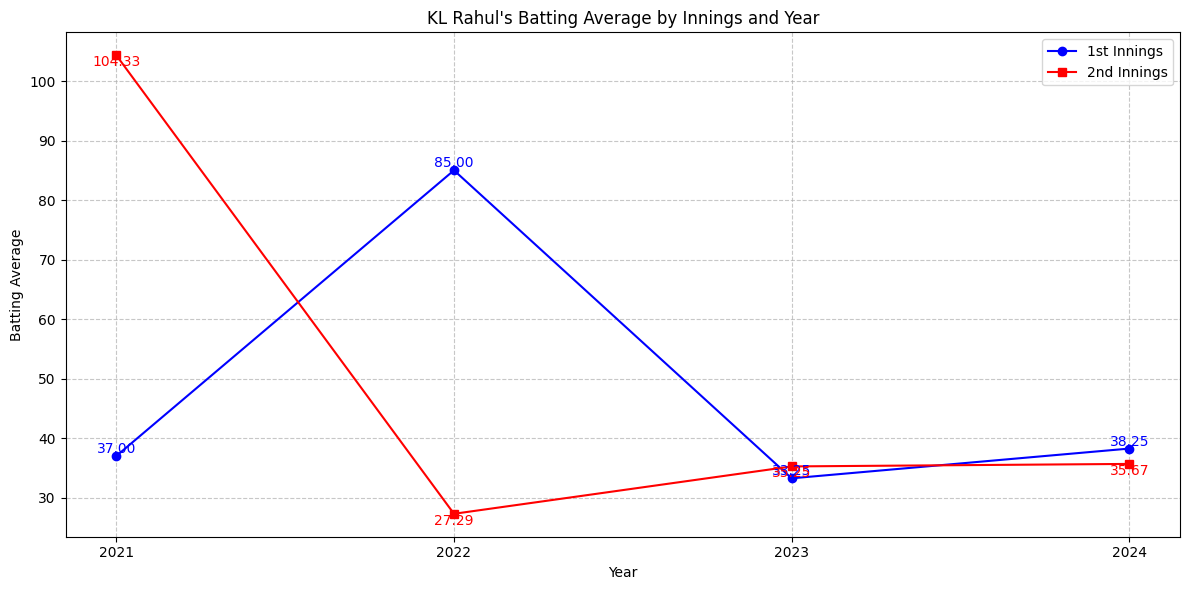

Available players:
['A Badoni' 'A Kamboj' 'A Manohar' 'A Mishra' 'A Nortje' 'A Raghuvanshi'
 'A Tomar' 'A Zampa' 'AA Kulkarni' 'AB de Villiers' 'AD Russell'
 'AF Milne' 'AJ Finch' 'AJ Hosein' 'AJ Turner' 'AK Markram' 'AM Rahane'
 'AR Patel' 'AS Joseph' 'AS Roy' 'AT Rayudu' 'AU Rashid' 'Abdul Basith'
 'Abdul Samad' 'Abhishek Sharma' 'Abishek Porel' 'Akash Deep'
 'Akash Madhwal' 'Aman Hakim Khan' 'Anmolpreet Singh' 'Anuj Rawat'
 'Arjun Tendulkar' 'Arshad Khan' 'Arshad Khan (2)' 'Arshdeep Singh'
 'Ashutosh Sharma' 'Atharva Taide' 'Avesh Khan' 'Azmatullah Omarzai'
 'B Indrajith' 'B Kumar' 'B Sai Sudharsan' 'BA Stokes' 'BR Sharath'
 'C Green' 'C Sakariya' 'CH Gayle' 'CH Morris' 'CJ Jordan' 'CV Varun'
 'D Brevis' 'D Ferreira' 'D Padikkal' 'D Pretorius' 'D Wiese' 'DA Miller'
 'DA Warner' 'DG Nalkande' 'DJ Bravo' 'DJ Hooda' 'DJ Malan' 'DJ Mitchell'
 'DJ Willey' 'DL Chahar' 'DP Conway' 'DR Sams' 'DT Christian'
 'Dhruv Jurel' 'E Lewis' 'EJG Morgan' 'F du Plessis' 'FA Allen'
 'Fazalhaq Farooqi' '

In [56]:
# Assuming pivot_table is your DataFrame
player_name = 'KL Rahul'  # Change this to a player name that exists in your data

player_data = pivot_table[pivot_table['player'] == player_name]

if player_data.empty:
    print(f"No data found for player: {player_name}")
else:
    years = [2021, 2022, 2023, 2024]
    innings1_avg = []
    innings2_avg = []

    for year in years:
        innings1_avg.append(player_data[f'batting_avg_{year}_innings_1'].values[0])
        innings2_avg.append(player_data[f'batting_avg_{year}_innings_2'].values[0])

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(years, innings1_avg, marker='o', label='1st Innings', color='blue')
    plt.plot(years, innings2_avg, marker='s', label='2nd Innings', color='red')

    plt.title(f"{player_name}'s Batting Average by Innings and Year")
    plt.xlabel("Year")
    plt.ylabel("Batting Average")
    plt.xticks(years)  # Set x-ticks to be only the years
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add value labels on the points
    for i, (avg1, avg2) in enumerate(zip(innings1_avg, innings2_avg)):
        plt.text(years[i], avg1, f'{avg1:.2f}', ha='center', va='bottom', color='blue')
        plt.text(years[i], avg2, f'{avg2:.2f}', ha='center', va='top', color='red')

    plt.tight_layout()
    plt.show()

# Print available players for reference
print("Available players:")
print(pivot_table['player'].unique())